Has electronic music bpm increased over time? 
- Source = https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs https://www.kaggle.com/datasets/mcfurland/10-m-beatport-tracks-spotify-audio-features?select=bp_track.csv

In [20]:
# Importing neccessary packages 

import pandas as pd
import matplotlib.pyplot as plt 
import math
import numpy as np
from scipy.stats import f_oneway

In [2]:
# Assigning csv to variable  

spotify = pd.read_csv('data/spotify_songs.csv')

The dataset contains 6043 songs with the genre 'edm'

In [3]:
spotify.playlist_genre.value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [4]:
# Restricting spotify variable to entries where playlist genre is edm 

spotify = spotify[spotify['playlist_genre'] == 'edm']

No significant pattern appears for tempo change by release year for edm as a whole.  

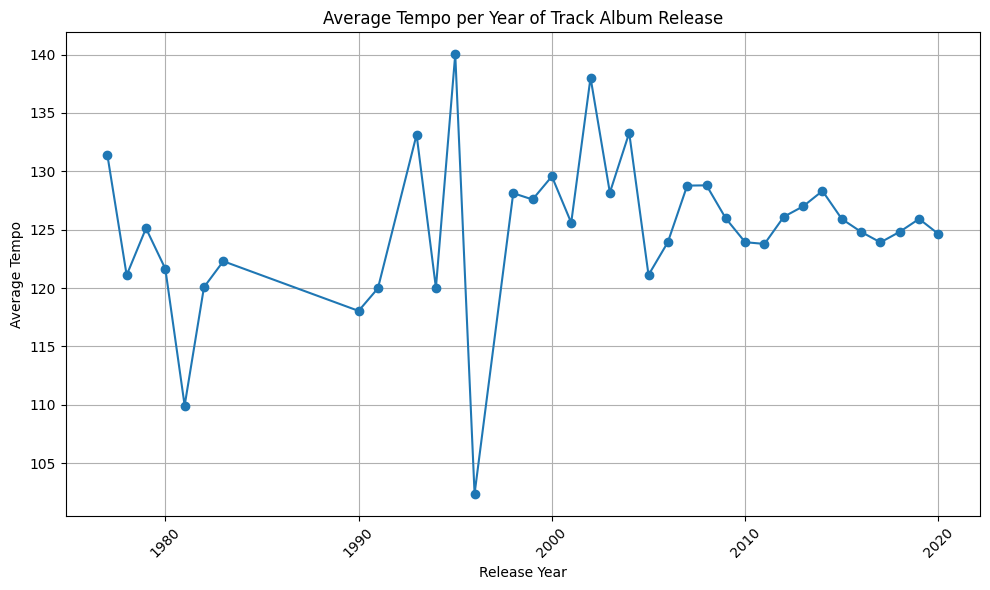

In [5]:
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date'], format='mixed', errors='coerce')
spotify['release_year'] = spotify['track_album_release_date'].dt.year


# Group by 'release_year' and aggregate tempo by mean (or other aggregation as needed)
spotify_yearly = spotify.groupby('release_year')['tempo'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(spotify_yearly['release_year'], spotify_yearly['tempo'], marker='o', linestyle='-')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.title('Average Tempo per Year of Track Album Release')
plt.xticks(rotation=45)  # Rotate if necessary
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Group data by release_year
years_s = spotify['release_year'].unique()

# Prepare BPM data for each year
bpm_groups = [spotify[spotify['release_year'] == year]['tempo'] for year in years_s]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*bpm_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in mean BPM across release years.")
else:
    print("No significant difference in mean BPM across release years.")

F-statistic: 1.3152920550678189, P-value: 0.10128669564476923
No significant difference in mean BPM across release years.


Similarly no significant pattern emerges even when grouping by subgenre. 

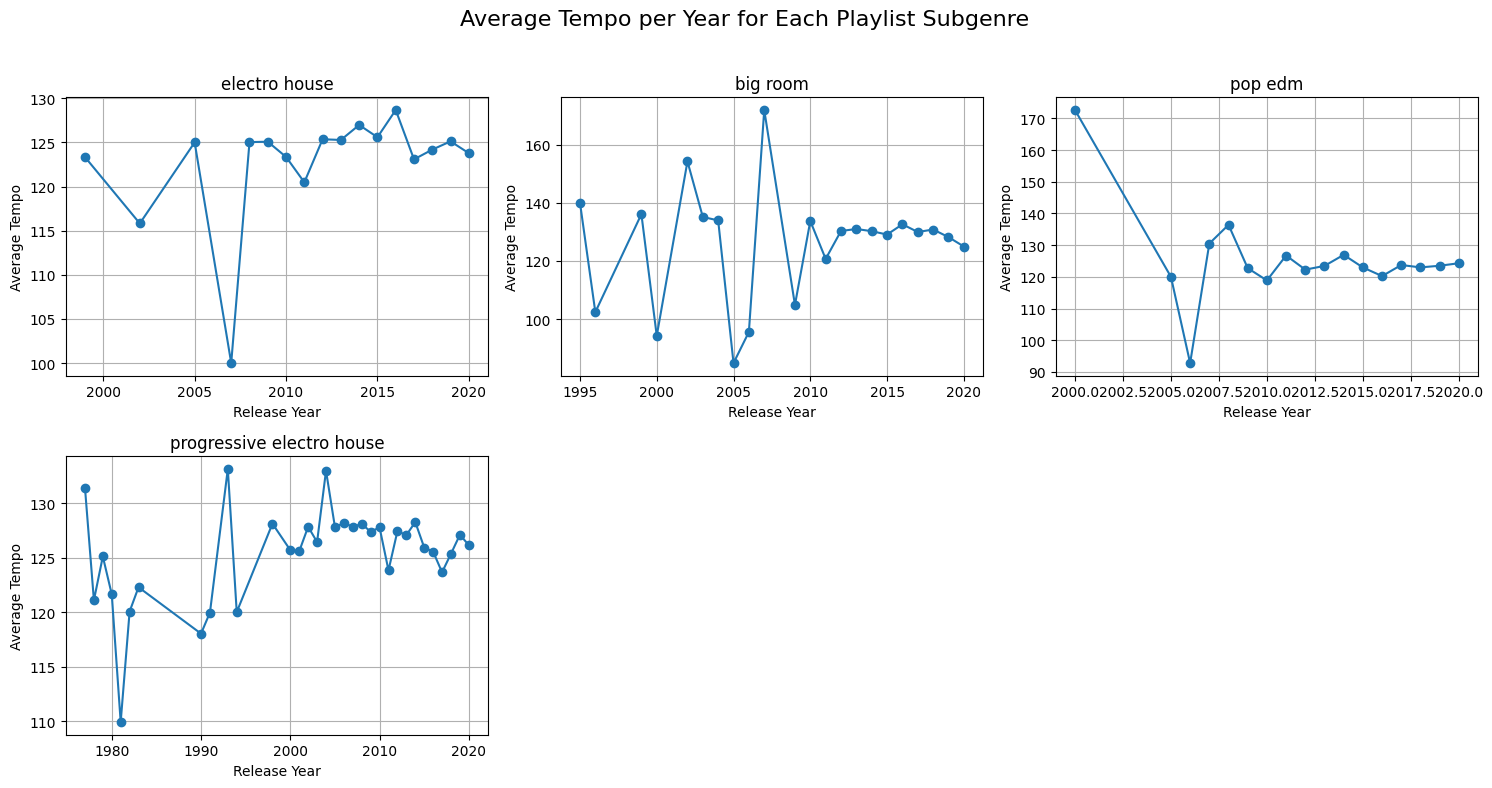

In [ ]:
subgenres = spotify['playlist_subgenre'].unique()

n_cols = 3
n_rows = math.ceil(len(subgenres) / n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), squeeze=False)
fig.suptitle('Average Tempo per Year for Each Playlist Subgenre', fontsize=16)

for idx, subgenre in enumerate(subgenres):
    row = idx // n_cols
    col = idx % n_cols
    
    subgenre_data = spotify[spotify['playlist_subgenre'] == subgenre]
    
    subgenre_yearly = subgenre_data.groupby('release_year')['tempo'].mean().reset_index()
    
    ax = axes[row, col]
    ax.plot(subgenre_yearly['release_year'], subgenre_yearly['tempo'], marker='o', linestyle='-')
    ax.set_title(subgenre)
    ax.set_xlabel('Release Year')
    ax.set_ylabel('Average Tempo')
    ax.grid(True)

for i in range(len(subgenres), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

However, significant upward trends in bpm over time are apparent in a much larger dataset taken from beatport (an online music store specialising in electronic genres)

In [7]:
bp = pd.read_csv("data/bp_track.csv", index_col=0)


/var/folders/jc/c0z81m7146x_0kpg0l5rbysm0000gn/T/ipykernel_1871/64615965.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  bp = pd.read_csv("data/bp_track.csv", index_col=0)


In [8]:
bp.head()

,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,duration_ms,isrc,key_id,label_id,release_id,updated_on,is_matched_spot
track_id,,,,,,,,,,,,,,,,
17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130,6:48,408830.0,DECY62300081,23.0,3222,4144460,2023-09-14 16:19:56,NaN
17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124,6:47,407439.0,GBCDK2303028,15.0,258,4091230,2023-09-14 16:19:56,NaN
17610338,Akawi,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/akawi/17610338,124,7:17,437066.0,GBCDK2303029,22.0,258,4091230,2023-09-14 16:19:56,NaN
17658499,Interplanetary Species,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/interplanetary-species/1765...,93,6:27,387096.0,DELK12300089,24.0,68438,4106998,2023-09-14 16:19:56,NaN
17658498,Echoing Planetary Motion,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/echoing-planetary-motion/17...,125,7:40,460800.0,DELK12300088,20.0,68438,4106998,2023-09-14 16:19:56,NaN


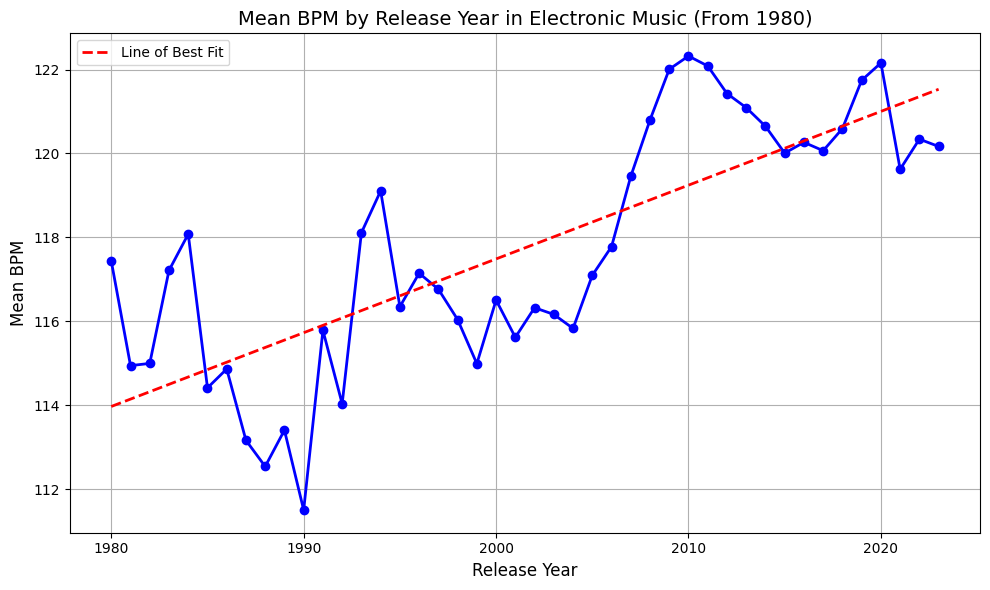

In [9]:
# Converting 'release_date' to datetime and extracting year
bp['release_date'] = pd.to_datetime(bp['release_date'], errors='coerce')
bp['release_year'] = bp['release_date'].dt.year

# Filtering to include only 1980 onwards
bp_filtered = bp[bp['release_year'] >= 1980]

# Calculate mean bpm for each release_year
mean_bpm_by_year = bp_filtered.groupby('release_year')['bpm'].mean().reset_index()

# Plot the mean BPM by release year
plt.figure(figsize=(10, 6))
plt.plot(mean_bpm_by_year['release_year'], mean_bpm_by_year['bpm'], marker='o', color='b', linestyle='-', linewidth=2)

# Fit a line of best fit 
p = np.polyfit(mean_bpm_by_year['release_year'], mean_bpm_by_year['bpm'], 1)  # 1st degree for linear fit
best_fit_line = np.polyval(p, mean_bpm_by_year['release_year'])  # Generate the best fit line values

# Plot 
plt.plot(mean_bpm_by_year['release_year'], best_fit_line, color='r', linestyle='--', linewidth=2, label='Line of Best Fit')

plt.title('Mean BPM by Release Year in Electronic Music (From 1980)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Mean BPM', fontsize=12)
plt.grid(True)

plt.legend()

plt.tight_layout()
plt.show()

In [11]:
len(bp)

10685331

In [ ]:
years = bp['release_year'].unique()

bpm_groups = [bp[bp['release_year'] == year]['bpm'] for year in years]

f_stat, p_value = f_oneway(*bpm_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in mean BPM across release years.")
else:
    print("No significant difference in mean BPM across release years.")

F-statistic: 526.5901107591372, P-value: 0.0
There is a significant difference in mean BPM across release years.
